<a href="https://colab.research.google.com/github/sharique2903/Final-Year-Project/blob/main/Final_Major_Project_(ECG_Signal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and preprocess data
def load_data():
    # Load the dataset from CSV file
    df = pd.read_csv('ecg.csv')
    data = df.iloc[:, :-1].values  # assuming the last column is the label
    labels = df.iloc[:, -1].values
    return data, labels

In [ ]:
def preprocess_data(data, labels):
    # Normalize data
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    # Reshape data for CNN input
    data = data.reshape((data.shape[0], data.shape[1], 1))
    return data, labels

In [ ]:
# Load data
data, labels = load_data()
data, labels = preprocess_data(data, labels)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Assuming 5 classes for classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.6224 - loss: 0.7746 - val_accuracy: 0.9580 - val_loss: 0.1409
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9655 - loss: 0.1170 - val_accuracy: 0.9730 - val_loss: 0.0723
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9783 - loss: 0.0747 - val_accuracy: 0.9760 - val_loss: 0.0668
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9840 - loss: 0.0496 - val_accuracy: 0.9850 - val_loss: 0.0492
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9888 - loss: 0.0488 - val_accuracy: 0.9790 - val_loss: 0.0541
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9883 - loss: 0.0360 - val_accuracy: 0.9830 - val_loss: 0.0460
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9860 - val_loss: 0.0418
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9913 - loss: 0.0343 - val_accu

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9886 - loss: 0.0520
Test Accuracy: 0.9909999966621399


In [ ]:
# Generate classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       410
         1.0       0.99      0.99      0.99       590

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



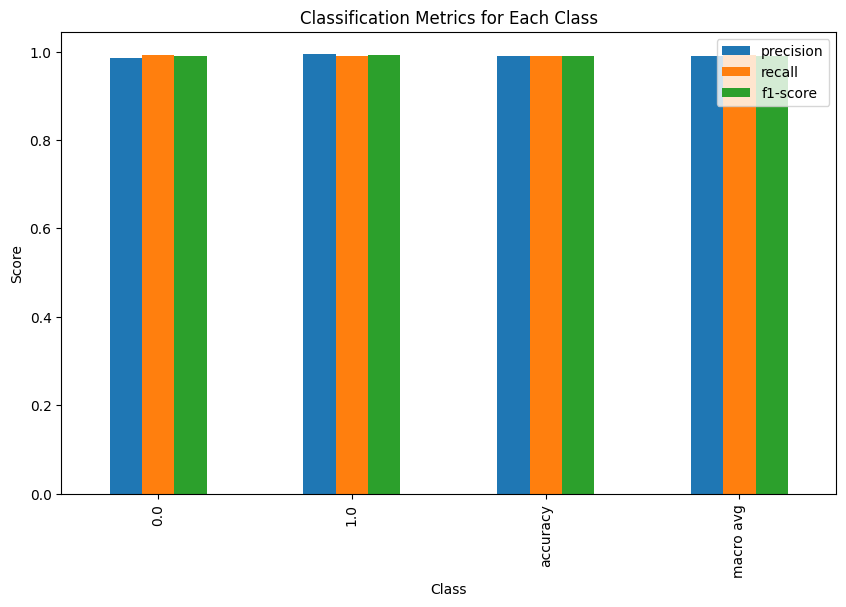

In [ ]:
# Bar Plot for Precision, Recall, F1-Score
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.iloc[:-1, :]  # Exclude 'accuracy' row

metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Metrics for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

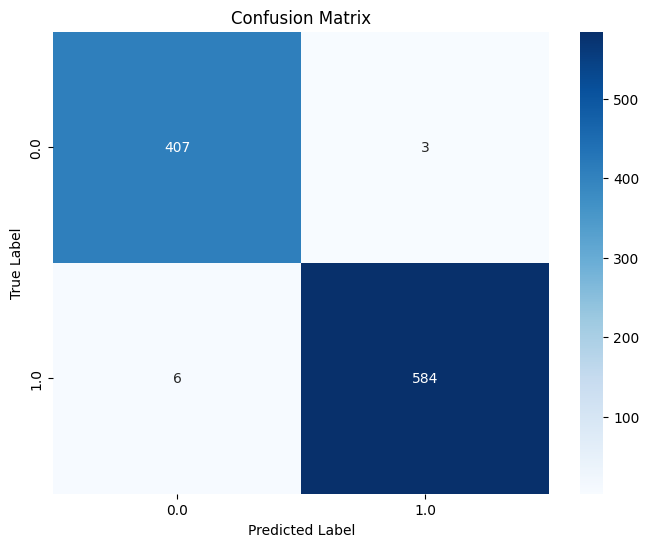

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Bar Plot for Precision, Recall, F1-Score
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.iloc[:-1, :]  # Exclude 'accuracy' row

Text(0.5, 1.0, 'Training and Validation Accuracy')

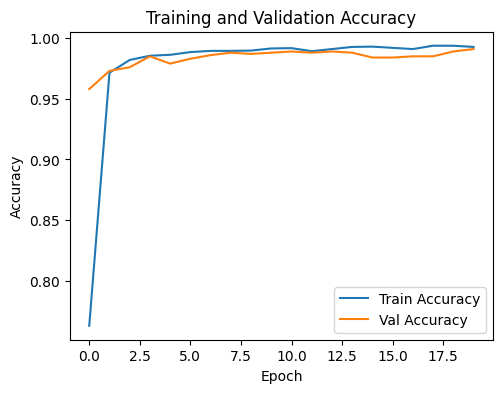

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

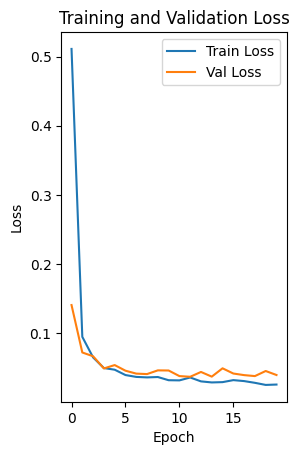

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# ECG Signal Visualization (Optional)
def plot_ecg_signal(raw_data, processed_data, sample_index):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(raw_data[sample_index], label='Raw ECG Signal')
    plt.title('Raw ECG Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(processed_data[sample_index].reshape(-1), label='Processed ECG Signal') # Removed unnecessary indent
    plt.title('Processed ECG Signal')
    plt.xlabel('Time')
    plt.ylabel('Normalized Amplitude')
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd # Import the pandas library

df = pd.read_csv('ecg.csv') # Load your data into a DataFrame named df

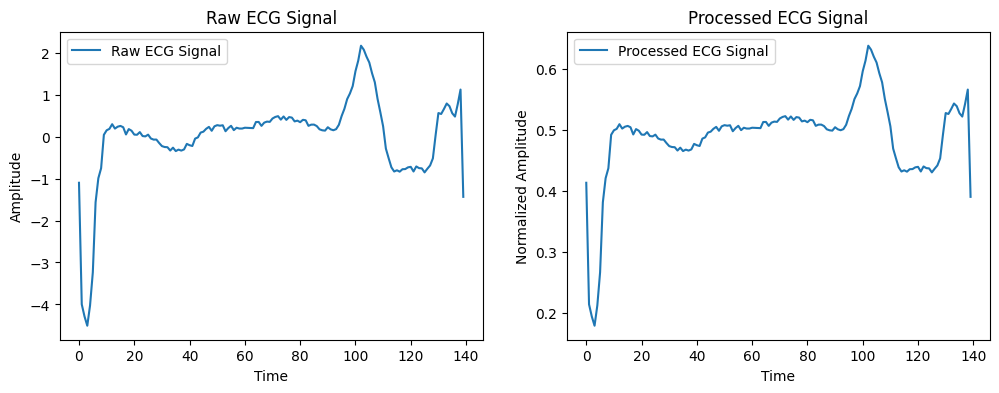

In [ ]:
# Example usage of ECG Signal Visualization
plot_ecg_signal(df.iloc[:, :-1].values, data, sample_index=0)

In [ ]:
# ECG Signal Visualization (Optional)
def plot_ecg_signal(raw_data, processed_data, sample_index):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(raw_data[sample_index], label='Raw ECG Signal')
    plt.title('Raw ECG Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(1, 2, 2)
    # Make sure 'processed_data' is defined and accessible here.
    # If it's calculated elsewhere, you need to pass it as an argument.
    # Example:
    # processed_data = some_processing_function(raw_data)
    plt.plot(processed_data[sample_index].reshape(-1), label='Processed ECG Signal')
    plt.title('Processed ECG Signal')
    plt.xlabel('Time')
    plt.ylabel('Normalized Amplitude')
    plt.legend()
    plt.show()

In [ ]:
# Example usage of ECG Signal Visualization
# Assuming 'df' is a pandas DataFrame that has been loaded or created previously
import pandas as pd

# Example DataFrame (replace with your actual data)
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})

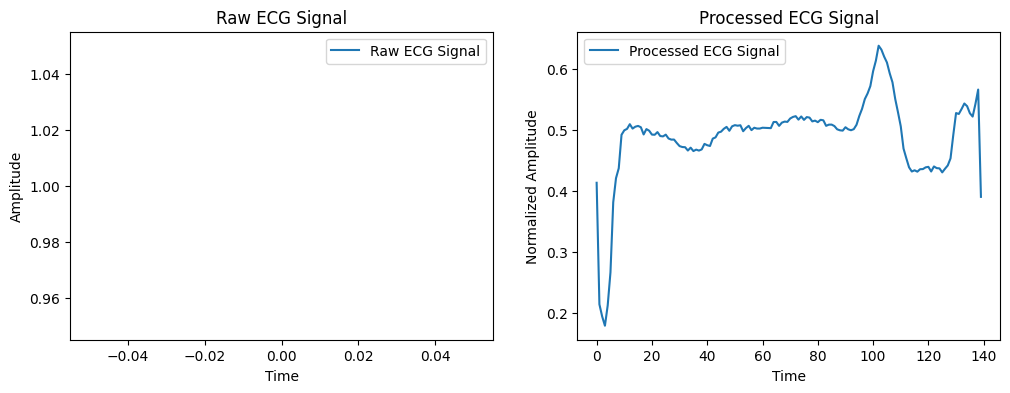

In [ ]:
# Example usage of ECG Signal Visualization
plot_ecg_signal(df.iloc[:, :-1].values, data, sample_index=0)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Plot raw ECG signals (Normal vs Abnormal)
def plot_ecg_signals(data, labels):
    plt.figure(figsize=(10, 6))


Text(0, 0.5, 'Amplitude')

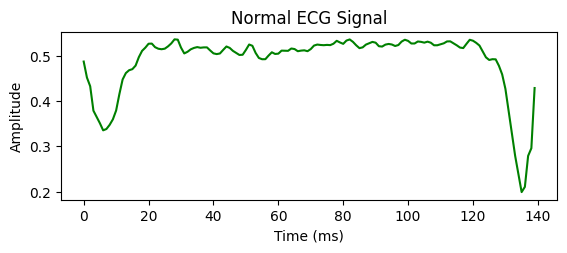

In [ ]:
    # Plot normal signals
    plt.subplot(2, 1, 1)
    plt.plot(data[labels == 0][0], color='green')  # Example of normal ECG
    plt.title('Normal ECG Signal')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')

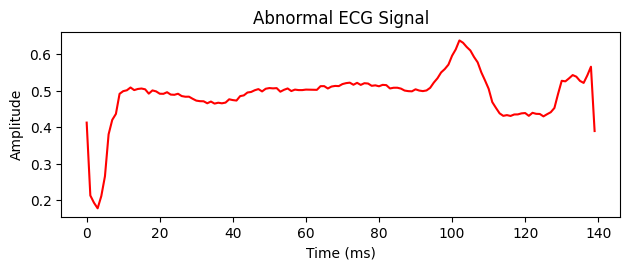

In [ ]:
    # Plot abnormal signals
    plt.subplot(2, 1, 2)
    plt.plot(data[labels == 1][0], color='red')  # Example of abnormal ECG
    plt.title('Abnormal ECG Signal')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


In [ ]:
# Call this function to plot ECG signals
plot_ecg_signals(data, labels)


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


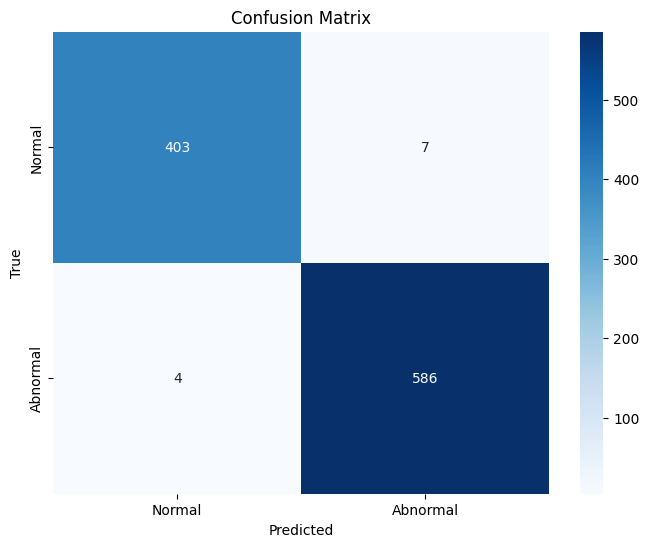

In [ ]:
# Call confusion matrix after generating predictions
plot_confusion_matrix(y_test, y_pred)


In [ ]:
# Plot Normal vs Abnormal ECG signals after model prediction
def plot_normal_abnormal_signals(X_test, y_test, y_pred):
    normal_idx = np.where((y_test == 0) & (y_pred == 0))[0][0]  # True positive normal
    abnormal_idx = np.where((y_test == 1) & (y_pred == 1))[0][0]  # True positive abnormal

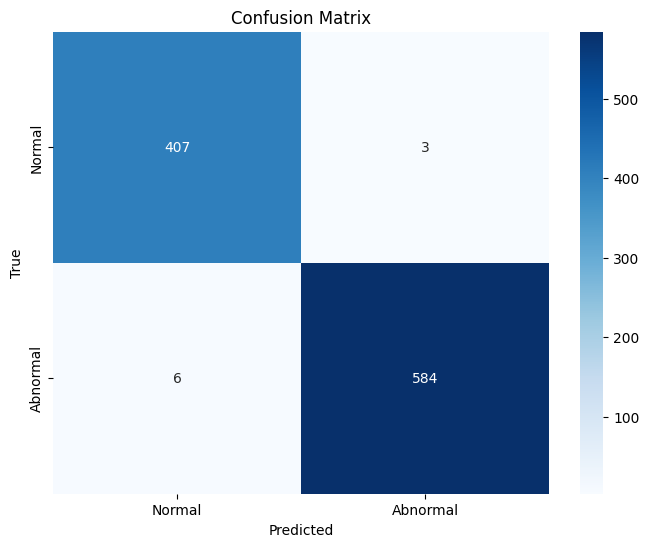

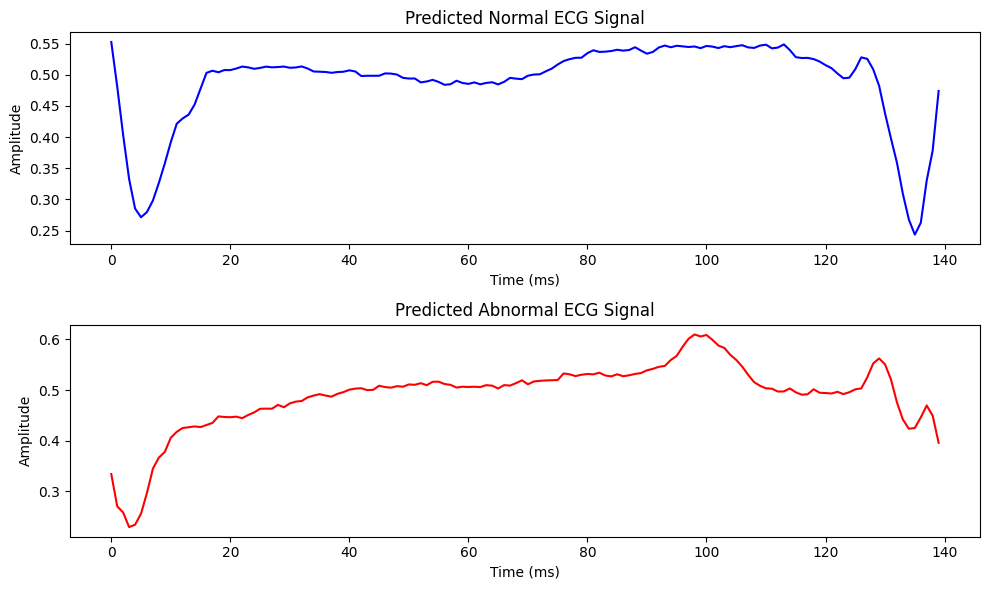

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Call confusion matrix after generating predictions
plot_confusion_matrix(y_test, y_pred)

# Plot Normal vs Abnormal ECG signals after model prediction
def plot_normal_abnormal_signals(X_test, y_test, y_pred):

    # Find indices of true positive normal and abnormal signals
    normal_idx = np.where((y_test == 0) & (y_pred == 0))[0][0]  # True positive normal
    abnormal_idx = np.where((y_test == 1) & (y_pred == 1))[0][0]  # True positive abnormal

    plt.figure(figsize=(10, 6))

    # Plot normal signals (true positive)
    plt.subplot(2, 1, 1)
    plt.plot(X_test[normal_idx], color='blue')
    plt.title('Predicted Normal ECG Signal')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')

     # Plot abnormal signals (true positive)
    plt.subplot(2, 1, 2)
    plt.plot(X_test[abnormal_idx], color='red')
    plt.title('Predicted Abnormal ECG Signal')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Assuming you have X_test, y_test, and y_pred defined
plot_normal_abnormal_signals(X_test, y_test, y_pred)

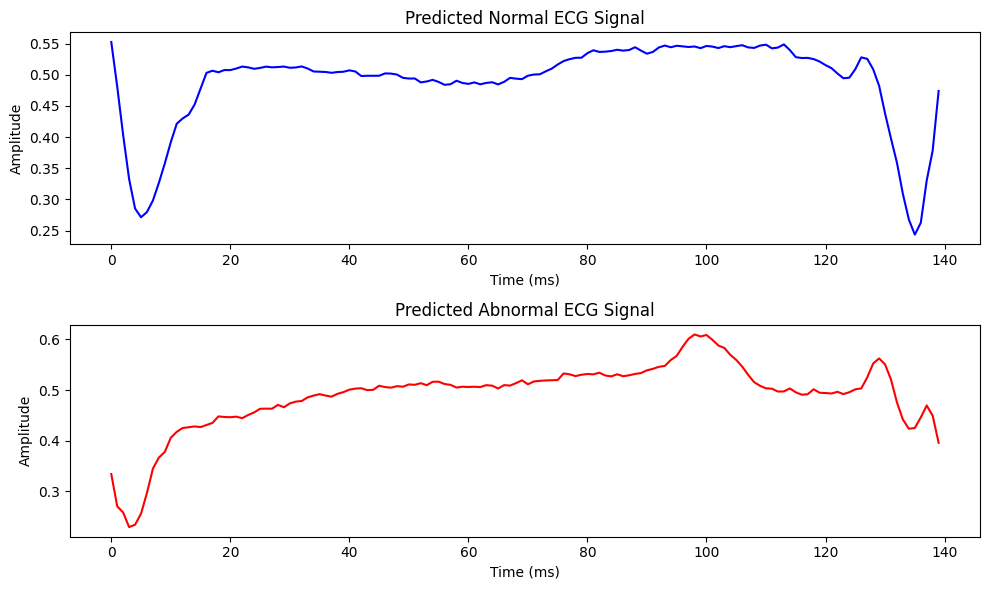

In [ ]:
# Call this function after prediction to plot normal and abnormal conditions
plot_normal_abnormal_signals(X_test, y_test, y_pred)

In [ ]:
# Generate classification report with precision, recall, F1-score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       410
         1.0       0.99      0.99      0.99       590

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

